In [7]:
import pandas as pd
tcs_df = pd.read_csv("./data/TCS.csv", index_col = "Date")
dlf_df = pd.read_csv("./data/DLF.csv", index_col = "Date")

In [8]:
tcs_df.head(4)


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
14-May-2019,2137.50,2158.2,2074.50,2094.35,2101.132647,107390,6246,225640635.0,28696,26.72,83.70,-43.15
13-May-2019,2140.00,2167.0,2122.85,2131.10,2137.064735,154027,5231,329165670.0,69558,45.16,44.15,-8.90
10-May-2019,2174.35,2193.6,2125.00,2135.55,2157.376335,105470,4688,227538482.0,26259,24.90,68.60,-38.80
9-May-2019,2145.00,2182.0,2138.00,2168.70,2169.785837,80051,4070,173693526.0,24870,31.07,44.00,23.70


In [9]:
tcs_df.head(4)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
14-May-2019,2137.50,2158.2,2074.50,2094.35,2101.132647,107390,6246,225640635.0,28696,26.72,83.70,-43.15
13-May-2019,2140.00,2167.0,2122.85,2131.10,2137.064735,154027,5231,329165670.0,69558,45.16,44.15,-8.90
10-May-2019,2174.35,2193.6,2125.00,2135.55,2157.376335,105470,4688,227538482.0,26259,24.90,68.60,-38.80
9-May-2019,2145.00,2182.0,2138.00,2168.70,2169.785837,80051,4070,173693526.0,24870,31.07,44.00,23.70


In [11]:
tcs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 14-May-2019 to 3-April-2017
Data columns (total 12 columns):
Open Price                   522 non-null float64
High Price                   522 non-null float64
Low Price                    522 non-null float64
Close Price                  522 non-null float64
WAP                          522 non-null float64
No.of Shares                 522 non-null int64
No. of Trades                522 non-null int64
Total Turnover (Rs.)         522 non-null float64
Deliverable Quantity         522 non-null int64
% Deli. Qty to Traded Qty    522 non-null float64
Spread High-Low              522 non-null float64
Spread Close-Open            522 non-null float64
dtypes: float64(9), int64(3)
memory usage: 53.0+ KB


## Questions
1. Which stock has higher risk ?
2. If invested 1 lakh, what is the maximum loss that is expected ?
3. Which stock has higher probability of making 3% more loss ?
4. Which stock has higher probability of making 2% more gain ?


### Calculating Stock Daily gains


In [12]:
tcs_df['gain'] = (tcs_df['Close Price'] - tcs_df['Open Price']) * 100/tcs_df['Open Price']

In [13]:
dlf_df['gain'] = (dlf_df['Close Price'] - dlf_df['Open Price']) * 100/dlf_df['Open Price']

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

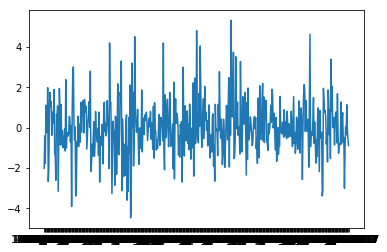

In [19]:
plt.plot(tcs_df.gain);

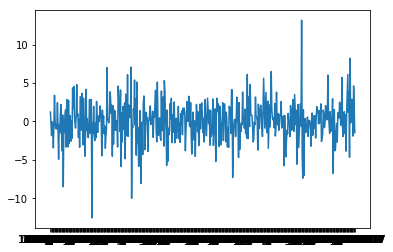

In [20]:
plt.plot(dlf_df.gain);

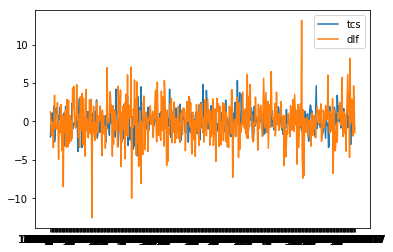

In [21]:
plt.plot(tcs_df.gain, label="tcs")
plt.plot(dlf_df.gain, label="dlf")
plt.legend();

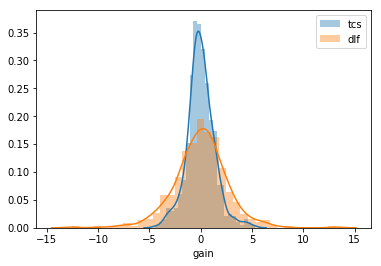

In [23]:
sn.distplot(tcs_df.gain, label="tcs")
sn.distplot(dlf_df.gain, label="dlf")
plt.legend();

In [24]:
tcs_df.gain.mean()


-0.0020057529759599305

In [28]:
tcs_df.gain.std()


1.3586822205929139

In [30]:
dlf_df.gain.mean()

-0.022901559826890742

In [31]:
dlf_df.gain.std()

2.6087724445879696

### Calculate range for normal distribution, Type of distribution gamma, variance etc

In [32]:
from scipy import stats

In [33]:
stats.norm.interval(0.95, tcs_df.gain.mean(),tcs_df.gain.std())

(-2.664973971772976, 2.6609624658210564)

## 1.36% chance for make loss of more than 3%

In [35]:
stats.norm.cdf(-3, tcs_df.gain.mean(),tcs_df.gain.std())

0.013672911294158624

In [36]:
stats.norm.cdf(-3, dlf_df.gain.mean(),dlf_df.gain.std())

0.12689595757843297

### 7.03 % chance of making more than 2 % gain

In [39]:
1 - stats.norm.cdf(2, tcs_df.gain.mean(),tcs_df.gain.std()) 

0.07030937129549963

In [42]:
1 - stats.norm.cdf(2, dlf_df.gain.mean(),dlf_df.gain.std()) 

0.21904494176859224